# Assignment 2

Create an “Academic performance” dataset of students and perform the following operations using Python.

1. Scan all variables for missing values and inconsistencies. If there are missing values
and/or inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan all numeric variables for outliers. If there are outliers, use any of the suitable techniques to deal with them. 
3. Apply data transformations on at least one of the variables. 

The purpose of this transformation should be one of the following reasons: to change the scale for better understanding of the variable, to convert a non-linear relation into a linear one, or to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

Dataset details: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
data = pd.read_csv("StudentsPerformance_modified.csv")

In [83]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [84]:
data = data.rename( columns={
    "race/ethnicity": "race" , 
    "parental level of education": "parent_edu" , 
    "test preparation course": "course_completed" , 
    "math score": "score_math" , 
    "reading score": "score_reading" , 
    "writing score": "score_writing"
} )
data.head()

,gender,race,parent_edu,lunch,course_completed,score_math,score_reading,score_writing
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0


In [85]:
data.dtypes

gender               object
race                 object
parent_edu           object
lunch                object
course_completed     object
score_math           object
score_reading       float64
score_writing       float64
dtype: object

In [86]:
data.isna().sum()

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          8
score_reading       6
score_writing       9
dtype: int64

In [87]:
data = data.dropna()

In [88]:
data.isin( [ "?" ] ).sum() 

gender               0
race                 0
parent_edu           0
lunch                0
course_completed     0
score_math          35
score_reading        0
score_writing        0
dtype: int64

Remove recordes with ? in score_math

In [89]:
data = data.loc[ data.score_math != "?" ]
data.isin( [ "?" ] ).sum() 

gender              0
race                0
parent_edu          0
lunch               0
course_completed    0
score_math          0
score_reading       0
score_writing       0
dtype: int64

In [90]:
data['score_math'] = data['score_math'].astype("int")
data['score_reading'] = data['score_reading'].astype("int")
data['score_writing'] = data['score_writing'].astype("int")

<Axes: ylabel='Count'>

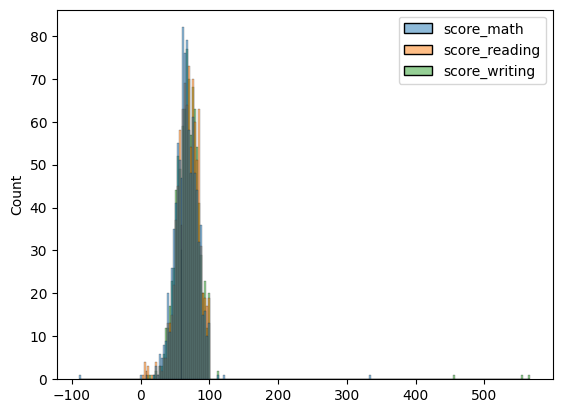

In [91]:
sns.histplot( data )

<Axes: xlabel='score_math', ylabel='Count'>

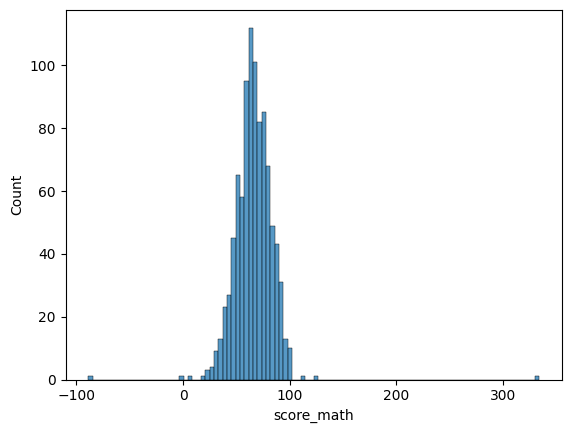

In [92]:
sns.histplot( data.score_math )

<Axes: xlabel='score_reading', ylabel='Count'>

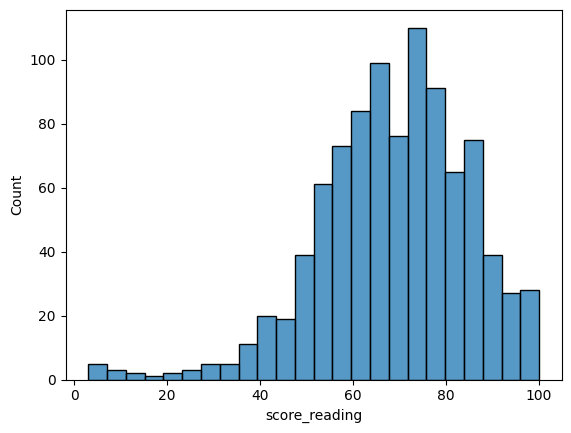

In [93]:
sns.histplot( data.score_reading )

<Axes: xlabel='score_writing', ylabel='Count'>

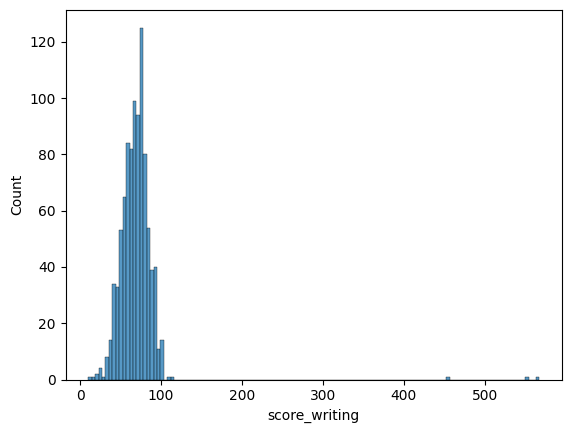

In [94]:
sns.histplot( data.score_writing )

## Box Plot

<Axes: >

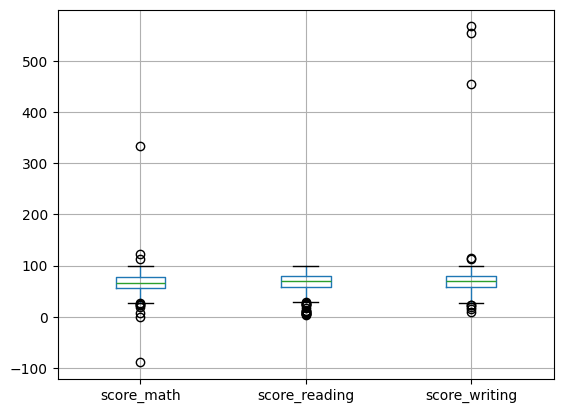

In [95]:
data.boxplot()

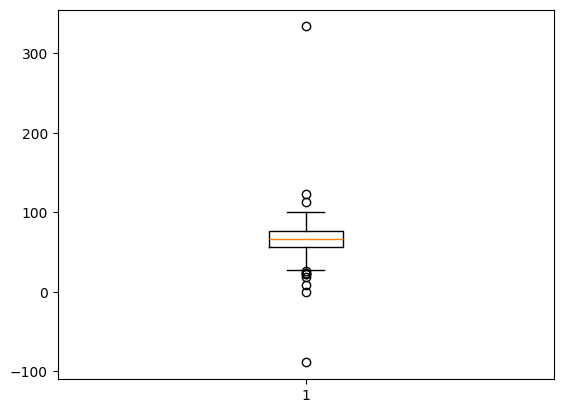

In [96]:
plt.boxplot(data['score_math']);

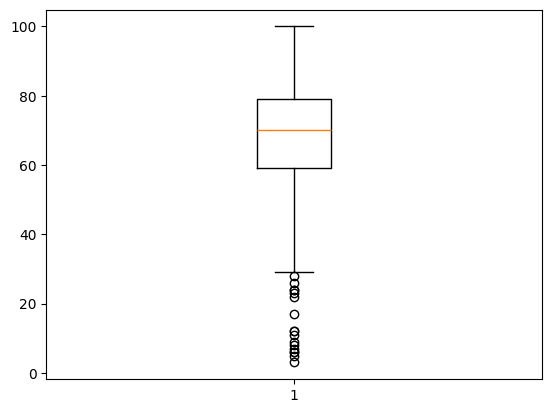

In [97]:
plt.boxplot(data['score_reading']);

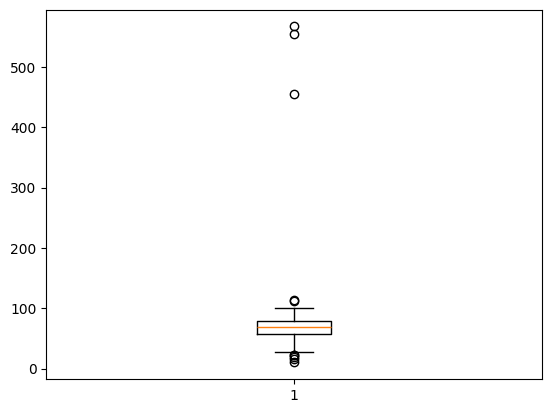

In [98]:
plt.boxplot(data['score_writing']);

## Z score

In [99]:
upper_limit = data['score_math'].mean() + 3* data['score_math'].std() # Right from the mean
lower_limit = data['score_math'].mean() - 3* data['score_math'].std() # Left from the mean
print(upper_limit)
print(lower_limit)

121.38339536482104
11.16591534567737


In [100]:
data.loc[data['score_math'] >= upper_limit, 'score_math']

431    123
474    334
Name: score_math, dtype: int32

## IQR


In [101]:
IQR = data['score_writing'].quantile(0.75) - data['score_writing'].quantile(0.25)
IQR

21.0

In [102]:
Higher_outlier = data['score_writing'].quantile(0.75) + (IQR * 1.5)
lower_outlier = data['score_writing'].quantile(0.25) - (IQR * 1.5)
print(Higher_outlier)
print(lower_outlier)

110.5
26.5


In [103]:
data.loc[data['score_writing'] >= Higher_outlier, 'score_writing']

459    112
465    114
542    455
591    567
651    554
Name: score_writing, dtype: int32

In [104]:
def remove_outliers(
    feature_name: str
):
    global data
    q3 , q1 = np.percentile( data[ feature_name ] , [ 75 , 25 ] )
    iqr = q3 - q1
    data = data[ (data[ feature_name ] >= q1 - 1.5 * iqr) & (data[ feature_name ] <= q3 + 1.5 * iqr) ]

remove_outliers( "score_reading" )

#### Treating/Cleaning Outlier

In the score_math column we will use the Z score upper_limit of 121 and lower_limit 11 to replace the outliers.

In [105]:
data.loc[data['score_math'] >= upper_limit, 'score_math'] = 121
data.loc[data['score_math'] <= lower_limit, 'score_math'] = 11

In the score_writing column we will use the IQR higher_outlier of 110.5 and lower_outlier 26.5 to replace the outliers.

In [106]:
data.loc[data['score_writing'] >= Higher_outlier, 'score_writing'] = 110.5
data.loc[data['score_writing'] <= lower_outlier, 'score_writing'] = 26.5

C:\Users\swara\AppData\Local\Temp\ipykernel_8900\817212349.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '110.5' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  data.loc[data['score_writing'] >= Higher_outlier, 'score_writing'] = 110.5


## Checking the final result after rwmoving th outiers

<Axes: >

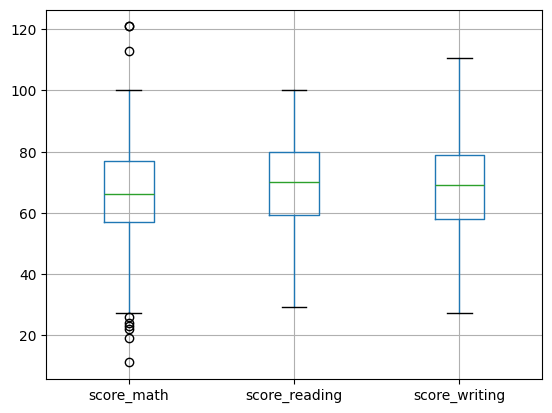

In [107]:
data.boxplot()

{'whiskers': [<matplotlib.lines.Line2D at 0x21cf0a46110>,
 'caps': [<matplotlib.lines.Line2D at 0x21cf1adbe80>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cf0a452a0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cf0a1ba90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cf1d2ccd0>],
 'means': []}

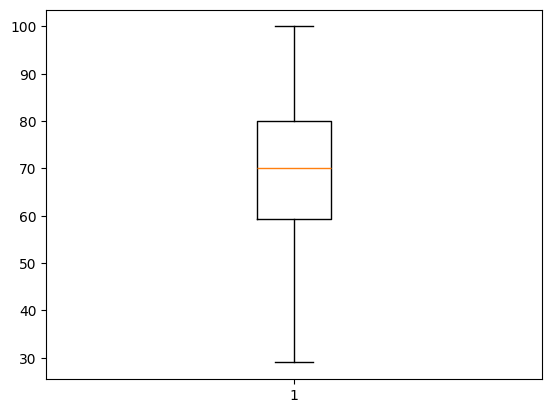

In [108]:

plt.boxplot(data['score_reading'])

{'whiskers': [<matplotlib.lines.Line2D at 0x21cf1dd0670>,
 'caps': [<matplotlib.lines.Line2D at 0x21cf1dd0bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21cf1dd03d0>],
 'medians': [<matplotlib.lines.Line2D at 0x21cf1dd10f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x21cf1dd1390>],
 'means': []}

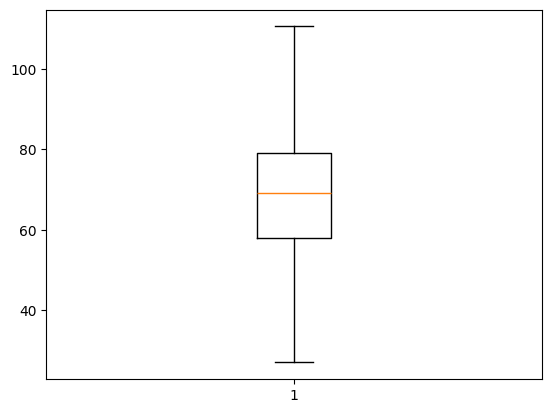

In [109]:

plt.boxplot(data['score_writing'])

## Data Normalization

In [110]:
def min_max_normalize(
    name: str
):
    data[ name ] = (data[ name ] - data[ name ].min()) / ( data[ name ].max() - data[ name ].min() )

In [111]:
min_max_normalize("score_reading")
min_max_normalize("score_math")
min_max_normalize("score_writing")

<Axes: xlabel='score_reading', ylabel='Count'>

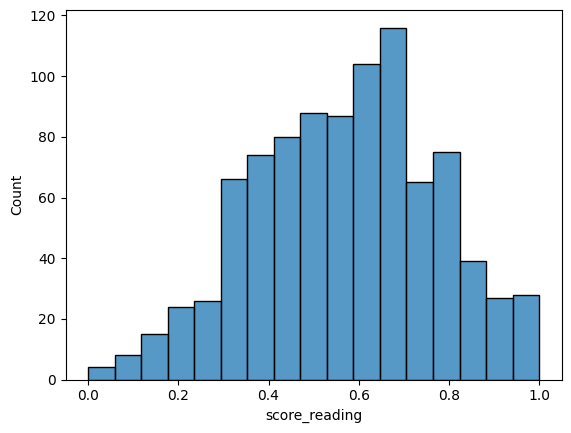

In [112]:
sns.histplot( data.score_reading )

<Axes: xlabel='score_math', ylabel='Count'>

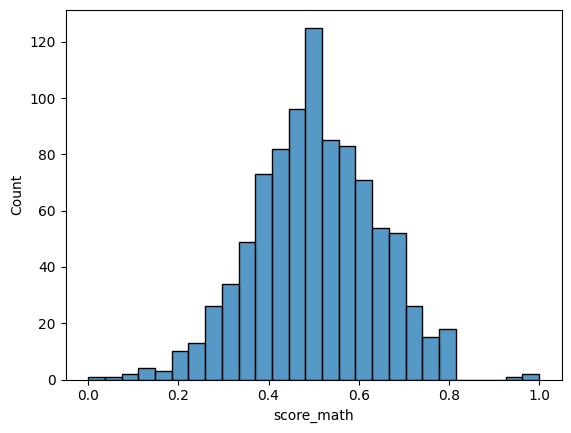

In [113]:
sns.histplot( data.score_math )

<Axes: xlabel='score_writing', ylabel='Count'>

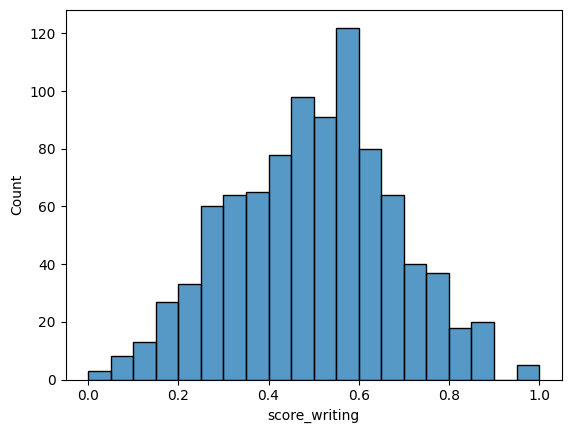

In [114]:
sns.histplot( data.score_writing )